In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
import warnings
warnings.filterwarnings('ignore')

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 시계열 분석
- 시계열 데이터 : 시간을 순차적으로 관측된 값들의 집함
- 분석 : 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법으로 과거의 패턴이 미래에도 지속된다는 안정성을 기본적은 가정으로 구현
- https://www.blockchain.com/explorer/charts/market-price

In [2]:
bitcoin = pd.read_csv('C:/k_digital/Pythonbasic/market-price.csv' , names = ['day','price'])
bitcoin

,day,price
0,2021/06/30 0:00,35847.70
1,2021/07/01 0:00,35047.36
2,2021/07/02 0:00,33536.88
3,2021/07/03 0:00,33856.86
4,2021/07/04 0:00,34688.98
...,...,...
356,2022/06/21 0:00,20582.29
357,2022/06/22 0:00,20703.51
358,2022/06/23 0:00,19953.71
359,2022/06/24 0:00,21088.30


In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
bitcoin.tail()

,day,price
356,2022/06/21 0:00,20582.29
357,2022/06/22 0:00,20703.51
358,2022/06/23 0:00,19953.71
359,2022/06/24 0:00,21088.30
360,2022/06/25 0:00,21194.68


In [5]:
bitcoin['day'] = pd.to_datetime(bitcoin['day'])
bitcoin.set_index('day' , inplace = True)
bitcoin.tail()

,price
day,
2022-06-21,20582.29
2022-06-22,20703.51
2022-06-23,19953.71
2022-06-24,21088.30
2022-06-25,21194.68


In [6]:
bitcoin.describe()

,price
count,361.000000
mean,43290.492022
std,10049.245982
min,18977.510000
25%,37661.190000
50%,42723.370000
75%,48392.790000
max,67562.170000


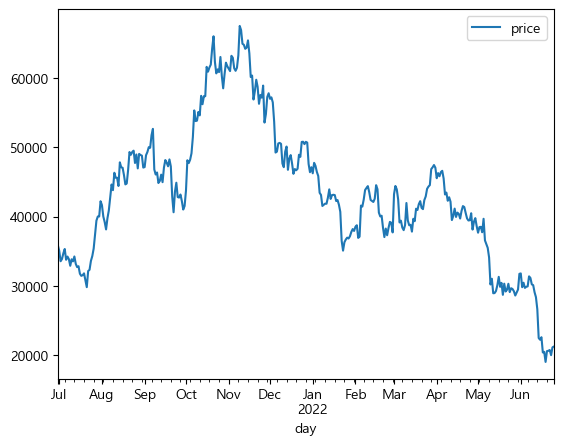

In [7]:
bitcoin.plot()
plt.show()

# ARIMA 모델( 시계열 데이터 분석 )

In [60]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin['price'].values , order = (2,1,2))
model_fit = model.fit()
model_fit

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        16:55:02   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3575      0.009     40.725      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -128.001      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.949      0.000      -0.410      -0.342
ma.L2          0.9980      0.050     19.769      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.56e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.62
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.56e+28. Standard errors may be unstable.
"""

 - order( p, d , q )
 - 일반적으로  p + q = 2 , p * q = 0 : AR이나 MA 중 하나만 적용해도 된다.

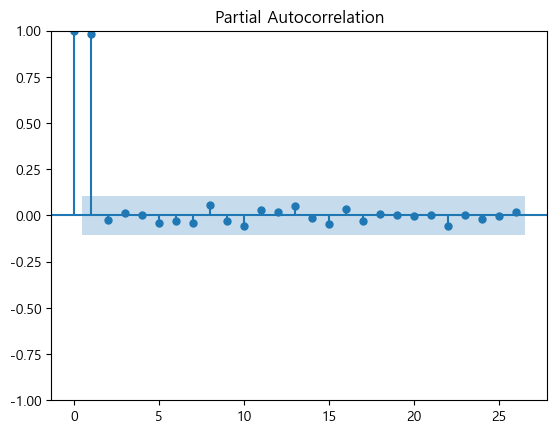

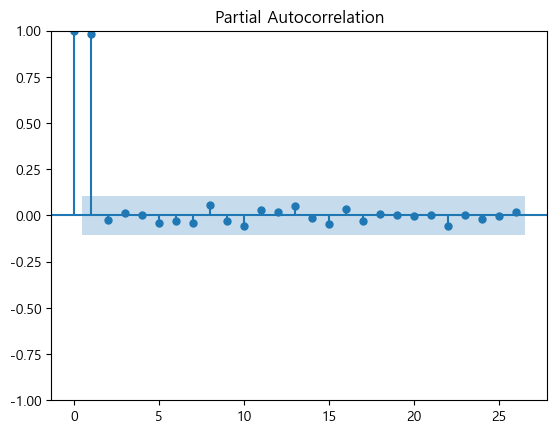

In [20]:
sm.graphics.tsa.plot_pacf(bitcoin)

In [22]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p , d , q))
for param in pdq:
    try:
        model_arima = ARIMA(bitcoin.price.values , order = param)
        model_arima_fit = model_arima.fit()
        print(param , model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 9446.769758583067
(0, 0, 1) 7255.645321448968


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(0, 0, 2) 6962.474557842052
(0, 0, 3) 6917.598958873208
(0, 0, 4) 7031.733924667771
(0, 1, 0) 6303.741389860343
(0, 1, 1) 6305.73035885569
(0, 1, 2) 6304.73430637126
(0, 1, 3) 6306.686736476049
(0, 1, 4) 6307.792260253307
(0, 2, 0) 6530.3725067107625
(0, 2, 1) 6387.1772790727755
(0, 2, 2) 6355.749542907095
(0, 2, 3) 6357.028434032756
(0, 2, 4) 6357.799883395665
(0, 3, 0) 6894.626800050759
(0, 3, 1) 6521.823717147387
(0, 3, 2) 6348.548518740747
(0, 3, 3) 6343.371747591826
(0, 3, 4) 6344.769009288568
(0, 4, 0) 7296.4219840058395
(0, 4, 1) 6882.212091030782
(0, 4, 2) 6522.142908882488
(0, 4, 3) 6379.688514573996
(0, 4, 4) 6438.020346738971
(1, 0, 0) 6328.336649699759
(1, 0, 1) 6330.156826964747
(1, 0, 2) 6330.303215619645
(1, 0, 3) 6332.3103750293485
(1, 0, 4) 6333.275626326593
(1, 1, 0) 6305.7258497109
(1, 1, 1) 6307.0057741538085
(1, 1, 2) 6306.680226075825
(1, 1, 3) 6308.1523172191655
(1, 1, 4) 6309.651863886722
(1, 2, 0) 6481.654674336989
(1, 2, 1) 6361.130232421107
(1, 2, 2) 6357.261

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(1, 3, 2) 6342.76437427619
(1, 3, 3) 6349.738101639269
(1, 3, 4) 6344.958410299554
(1, 4, 0) 7059.30599391195
(1, 4, 1) 6708.206929723266
(1, 4, 2) 6459.003592570329
(1, 4, 3) 6492.94612538587
(1, 4, 4) 6384.086363682983
(2, 0, 0) 6330.180830083385
(2, 0, 1) 6331.394768538114
(2, 0, 2) 6332.422681552645
(2, 0, 3) 6333.392642394889
(2, 0, 4) 6335.182909484523
(2, 1, 0) 6304.441517599998
(2, 1, 1) 6306.432590348124


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 2) 6300.469798230842


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 3) 6302.562664780775


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 1, 4) 6303.869644847808
(2, 2, 0) 6434.9441248795565
(2, 2, 1) 6356.867916583208
(2, 2, 2) 6357.669383928685
(2, 2, 3) 6359.3120373102265


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 2, 4) 6357.140137655491
(2, 3, 0) 6649.713562365992
(2, 3, 1) 6413.05132991366


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 2) 6357.999340541339


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 3, 3) 6346.609539906545
(2, 3, 4) 6361.076480007044
(2, 4, 0) 6918.066446534338
(2, 4, 1) 6645.34094650533
(2, 4, 2) 6441.616098299843
(2, 4, 3) 6458.99036011172


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2, 4, 4) 6443.683895428636
(3, 0, 0) 6330.102377313779
(3, 0, 1) 6332.083295076961


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 2) 6327.284368432609


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 3) 6329.852869803755


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 0, 4) 6331.401470505101
(3, 1, 0) 6306.4042317519015
(3, 1, 1) 6307.920571988411


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 2) 6302.568924329891
(3, 1, 3) 6309.735179881894


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 1, 4) 6306.011019557656
(3, 2, 0) 6408.058426230722
(3, 2, 1) 6358.823949969521
(3, 2, 2) 6359.679298713908
(3, 2, 3) 6361.693571896638


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 2, 4) 6360.54350900632
(3, 3, 0) 6574.61912345804
(3, 3, 1) 6388.286003973194


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 2) 6345.917850923375


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 3, 3) 6357.388865887228
(3, 3, 4) 6354.2608510006685
(3, 4, 0) 6825.603233528073
(3, 4, 1) 6583.064554145749


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 2) 6405.523037918783
(3, 4, 3) 6446.063238076631


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4, 4) 6483.349041761063
(4, 0, 0) 6332.053570495364
(4, 0, 1) 6334.109383085807


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 2) 6332.032976416445


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 3) 6331.081074971628


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0, 4) 6333.0803737811475
(4, 1, 0) 6307.4920749788635
(4, 1, 1) 6309.238585560035


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 2) 6303.691755266789


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 3) 6306.355786794661


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 4) 6304.121956210758
(4, 2, 0) 6394.513611611508
(4, 2, 1) 6359.5212419223635
(4, 2, 2) 6361.6212787612585


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 3) 6361.930460319209


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 2, 4) 6362.180165854331
(4, 3, 0) 6513.438473140734
(4, 3, 1) 6375.93127008136


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 2) 6363.304899579303


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 3) 6355.4389464098285


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3, 4) 6355.295474945244
(4, 4, 0) 6742.092438508027
(4, 4, 1) 6526.15200985567


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 2) 6392.643959348865


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4, 3) 6430.572263197086
(4, 4, 4) 6468.459826281588


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(bitcoin['price'].values , order = (2,1,2))
model_fit = model.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


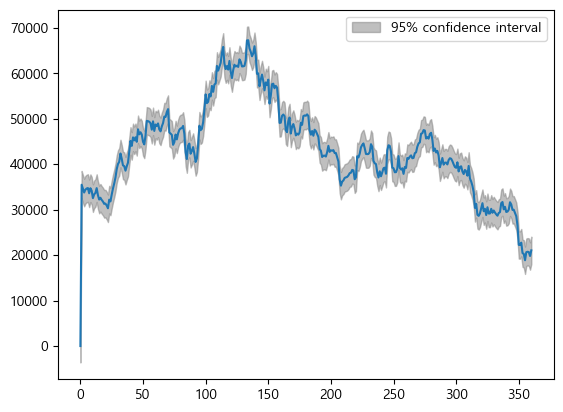

In [26]:
fig = sm.graphics.tsa.plot_predict(model_fit)

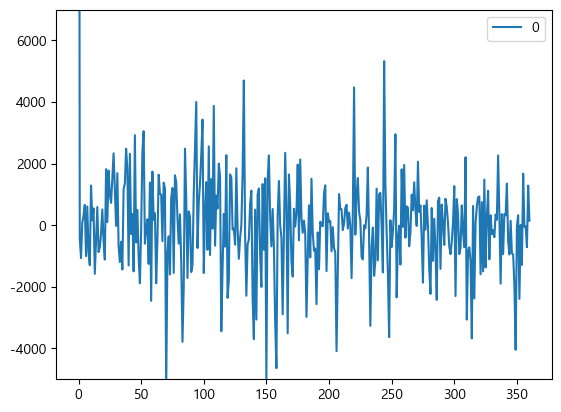

In [28]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.ylim(-5000,7000)
plt.show()

In [29]:
test = pd.read_csv('C:/k_digital/Pythonbasic/market-price-test.csv' , names = ['ds' , 'y'])
# 학습한 모델을 이용하여 5일 뒤의 값을 예측

predict = model_fit.forecast(steps = 5)
predict

array([21332.38450788, 21425.59465777, 21322.44435339, 21193.19396232,
       21249.21555904])

In [34]:
test.tail()

,ds,y
0,2022/06/26 0:00,21481.38
1,2022/06/27 0:00,21020.04
2,2022/06/28 0:00,20702.23
3,2022/06/29 0:00,20256.61
4,2022/06/30 0:00,20085.93


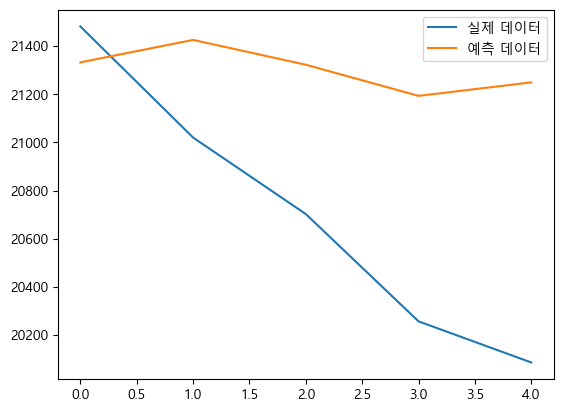

In [33]:
plt.plot(test['y'].tail() , label = '실제 데이터')
plt.plot(predict , label = '예측 데이터')
plt.legend()
plt.show()

In [38]:
pred_y = predict.tolist()
test_y = test['y'].tail().tolist()

print(pred_y,test_y , sep='\n')




[21332.384507879728, 21425.594657770653, 21322.44435338963, 21193.193962322923, 21249.215559041644]
[21481.38, 21020.04, 20702.23, 20256.61, 20085.93]


In [40]:
np.min(pred_y)

21193.193962322923

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y , test_y))
rmse

748.5670165880254

## Grid Search

In [44]:
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#progress bar를 표현하는 패키지

In [48]:
p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p , d , q))

aic = []
params = []
with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(bitcoin.price.values , order = (i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic , 2))
            params.append(i)
        except:
            continue
    

 72%|███████████████████████████████████████████████████████████▏                      | 13/18 [00:00<00:00, 16.21it/s]C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 89%|████████████████████████████████████████████████████████████████████████▉         | 16/18 [00:01<00:00, 11.87it/s]C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:01<00:00,  6.21it/s]C:\A

In [56]:
optimal = [(params[i] , j) for i,j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 2), 6300.47)]

In [57]:
model_opt = SARIMAX(bitcoin.price.values , order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        16:54:06   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3575      0.009     40.725      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -128.001      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.949      0.000      -0.410      -0.342
ma.L2          0.9980      0.050     19.769      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.56e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.62
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.56e+28. Standard errors may be unstable.
"""

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        16:55:09   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3575      0.009     40.725      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -128.001      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.949      0.000      -0.410      -0.342
ma.L2          0.9980      0.050     19.769      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.56e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.62
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.56e+28. Standard errors may be unstable.
"""